# Options Greeks

Options Greeks are risk metrics that quantify how sensitive an option's price is to various factors, helping traders understand and manage the risks associated with options. The primary Greeks include:

- Delta: Measures the sensitivity of an option's price to changes in the underlying asset's price.

- Gamma: Indicates the rate of change of Delta, showing how Delta shifts as the underlying price moves.

- Theta: Known as "time decay," it measures how an option's price changes as expiration approaches.

- Vega: Reflects sensitivity to changes in the underlying asset's volatility.

- Rho: Measures sensitivity to changes in the risk-free interest rate.

Beyond these, other higher-order Greeks, like Charm, Vanna, and Vomma, provide additional insights, particularly for complex or rapidly changing market conditions.


## Introduction to Delta and Gamma
Delta and Gamma are two of the most commonly used Greeks in options trading and risk management. They provide insights into the sensitivity of an option’s price with respect to changes in the underlying asset’s price.

### 1. Delta
Delta measures the sensitivity of an option's price to a $1 change in the price of the underlying asset. It can be interpreted as the probability of the option finishing in-the-money.

#### Formula for Delta
For a call option:
$$\Delta_{call} = N(d_1)$$

For a put option:
$$\Delta_{put} = N(d_1) - 1$$

where $d_1$ is defined as:
$$d_1 = \frac{\ln(S / K) + (r + 0.5 \sigma^2) T}{\sigma \sqrt{T}}$$

#### Intuitive Interpretation
- **Call Options**: Delta ranges from 0 to 1, where a Delta close to 1 indicates a high probability of the option being in-the-money.
- **Put Options**: Delta ranges from -1 to 0, with values closer to -1 indicating a higher probability of finishing in-the-money.

### 2. Gamma
Gamma is the rate of change of Delta with respect to the underlying asset’s price. It provides insight into how stable Delta is as the underlying price changes.

#### Formula for Gamma
For both call and put options:
$$\Gamma = \frac{N'(d_1)}{S \cdot \sigma \cdot \sqrt{T}}$$

where $N'(d_1)$ is the probability density function of the standard normal distribution at $d_1$.

#### Intuitive Interpretation
Gamma is highest for at-the-money options and decreases as the option goes further in-the-money or out-of-the-money. High Gamma values indicate a more sensitive Delta, which requires more frequent adjustments in hedging.

The following sections will visualize Delta and Gamma for both call and put options.



## Visualizing Delta for Call and Put Options
This plot shows how Delta varies with the underlying asset's price, illustrating the different Delta behaviors for call and put options.


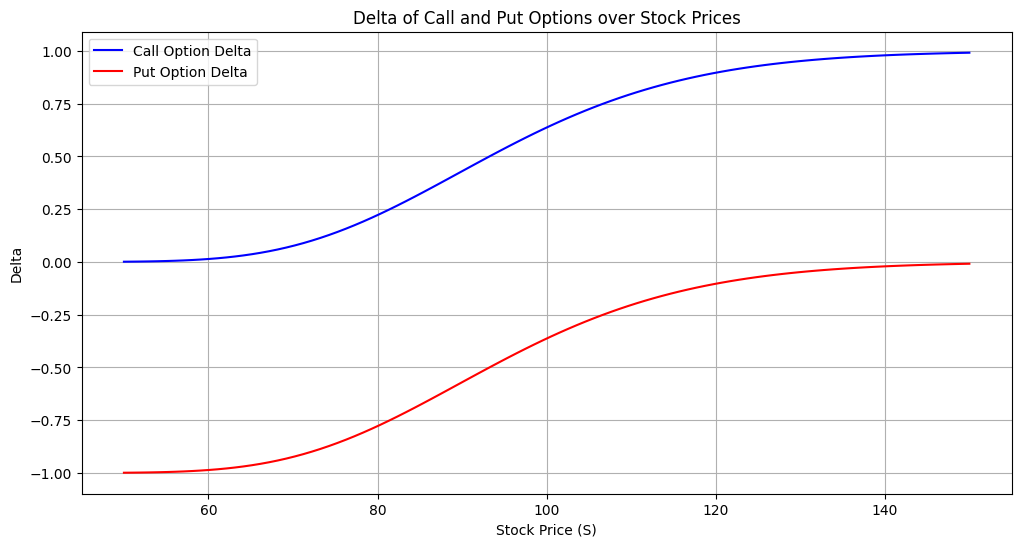

In [2]:

# Import necessary libraries
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Define Delta calculation for call and put options
def delta(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == "call":
        return norm.cdf(d1)
    elif option_type == "put":
        return norm.cdf(d1) - 1

# Parameters
K = 100  # Strike price
T = 1    # Time to expiration in years
r = 0.05 # Risk-free interest rate
sigma = 0.2  # Volatility

# Range of stock prices
S_range = np.linspace(50, 150, 100)

# Calculate Delta for call and put options
delta_call = [delta(s, K, T, r, sigma, "call") for s in S_range]
delta_put = [delta(s, K, T, r, sigma, "put") for s in S_range]

# Plotting Delta for Call and Put Options
plt.figure(figsize=(12, 6))
plt.plot(S_range, delta_call, label="Call Option Delta", color="blue")
plt.plot(S_range, delta_put, label="Put Option Delta", color="red")
plt.xlabel("Stock Price (S)")
plt.ylabel("Delta")
plt.title("Delta of Call and Put Options over Stock Prices")
plt.legend()
plt.grid(True)
plt.show()



## Visualizing Gamma for Call and Put Options
This plot shows Gamma values over a range of underlying asset prices, illustrating how Gamma behaves for both call and put options.


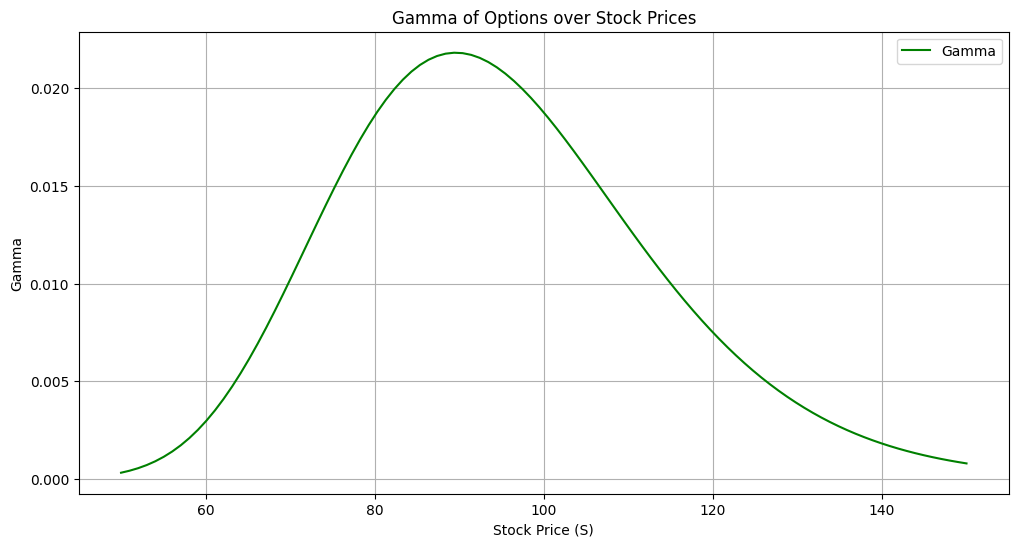

In [3]:

# Define Gamma calculation
def gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

# Calculate Gamma across a range of stock prices
gamma_values = [gamma(s, K, T, r, sigma) for s in S_range]

# Plotting Gamma
plt.figure(figsize=(12, 6))
plt.plot(S_range, gamma_values, color="green", label="Gamma")
plt.xlabel("Stock Price (S)")
plt.ylabel("Gamma")
plt.title("Gamma of Options over Stock Prices")
plt.legend()
plt.grid(True)
plt.show()



## Introduction to Theta
Theta, often referred to as **time decay**, measures the rate of change of an option’s price with respect to time. As expiration approaches, the time value of an option decreases, which is quantified by Theta.

### Formula for Theta
For a call option:
$$\Theta_{call} = -\frac{S \cdot N'(d_1) \cdot \sigma}{2 \sqrt{T}} - r \cdot K \cdot e^{-r T} \cdot N(d_2)$$

For a put option:
$$\Theta_{put} = -\frac{S \cdot N'(d_1) \cdot \sigma}{2 \sqrt{T}} + r \cdot K \cdot e^{-r T} \cdot N(-d_2)$$

where:
- $S$: Current stock price
- $K$: Strike price of the option
- $T$: Time to expiration (in years)
- $r$: Risk-free interest rate
- $\sigma$: Volatility of the stock
- $N(\cdot)$: Cumulative distribution function of the standard normal distribution
- $d_1$ and $d_2$ are the Black-Scholes variables:
  $$d_1 = \frac{\ln(S / K) + (r + 0.5 \sigma^2) T}{\sigma \sqrt{T}}$$
  $$d_2 = d_1 - \sigma \sqrt{T}$$

### Intuition Behind Theta
- **Negative Theta**: Both call and put options generally have negative Theta, meaning their value decreases as time passes.
- **Higher Impact Near Expiration**: Theta has a greater impact as the option nears expiration, especially for at-the-money options.

Theta is a crucial Greek for understanding time decay in options, particularly for strategies involving selling options.

## Visualizing Theta for Call and Put Options
Below is a visualization showing how Theta changes over a range of stock prices for both call and put options.


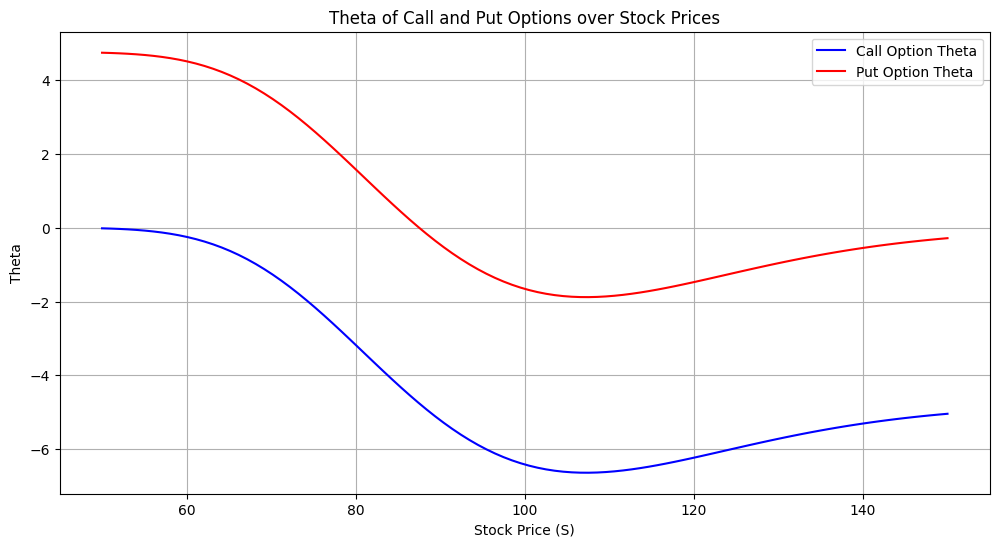

In [4]:

# Define Theta calculation for call and put options
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def theta(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == "call":
        return - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        return - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)

# Parameters
K = 100  # Strike price
T = 1    # Time to expiration in years
r = 0.05 # Risk-free interest rate
sigma = 0.2  # Volatility

# Range of stock prices
S_range = np.linspace(50, 150, 100)

# Calculate Theta for call and put options
theta_call = [theta(s, K, T, r, sigma, "call") for s in S_range]
theta_put = [theta(s, K, T, r, sigma, "put") for s in S_range]

# Plotting Theta for Call and Put Options
plt.figure(figsize=(12, 6))
plt.plot(S_range, theta_call, label="Call Option Theta", color="blue")
plt.plot(S_range, theta_put, label="Put Option Theta", color="red")
plt.xlabel("Stock Price (S)")
plt.ylabel("Theta")
plt.title("Theta of Call and Put Options over Stock Prices")
plt.legend()
plt.grid(True)
plt.show()



## Introduction to Vega
Vega measures the sensitivity of the option’s price to changes in the volatility of the underlying asset. It reflects how much the price of an option will increase or decrease with a 1% change in the volatility.

### Formula for Vega
Vega is the same for both call and put options:
$$ \text{Vega} = S \cdot N'(d_1) \cdot \sqrt{T} $$

where:
- $S$: Current stock price
- $T$: Time to expiration (in years)
- $\sigma$: Volatility of the stock
- $N'(d_1)$: Probability density function of the standard normal distribution at $d_1$
- $d_1$ is defined as:
  $$ d_1 = \frac{\ln(S / K) + (r + 0.5 \sigma^2) T}{\sigma \sqrt{T}} $$

### Intuition Behind Vega
- **Sensitivity to Volatility**: Vega increases when an option has a longer time to expiration, as more time increases the potential price swings.
- **Greater for At-the-Money Options**: Vega is highest for at-the-money options, where the uncertainty and sensitivity to volatility are greatest.

Understanding Vega is critical for traders in volatile markets or those using options to speculate on volatility changes.

## Visualizing Vega
Below is a visualization of Vega over a range of stock prices to show how Vega changes with the price of the underlying asset.


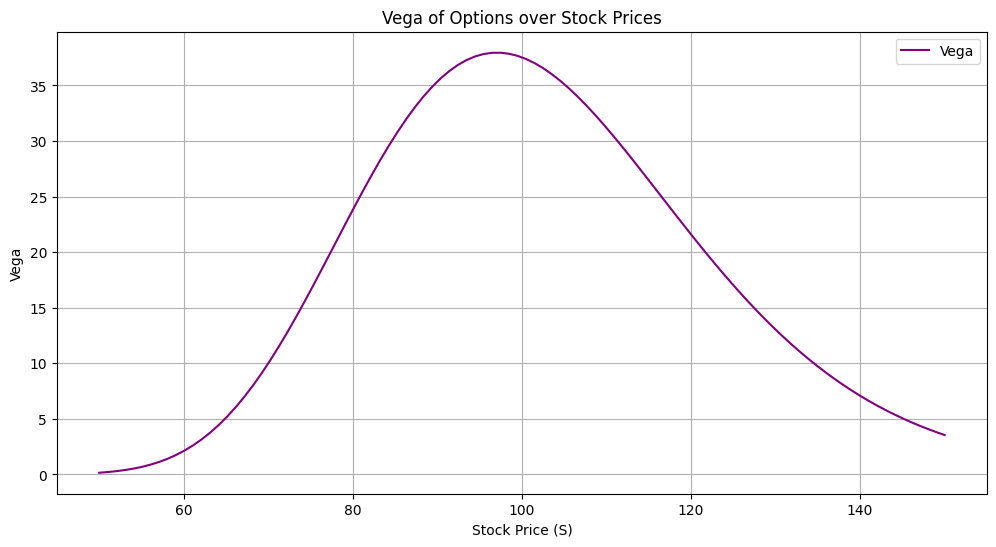

In [5]:

# Define Vega calculation
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

# Parameters
K = 100  # Strike price
T = 1    # Time to expiration in years
r = 0.05 # Risk-free interest rate
sigma = 0.2  # Volatility

# Range of stock prices
S_range = np.linspace(50, 150, 100)

# Calculate Vega across a range of stock prices
vega_values = [vega(s, K, T, r, sigma) for s in S_range]

# Plotting Vega
plt.figure(figsize=(12, 6))
plt.plot(S_range, vega_values, color="purple", label="Vega")
plt.xlabel("Stock Price (S)")
plt.ylabel("Vega")
plt.title("Vega of Options over Stock Prices")
plt.legend()
plt.grid(True)
plt.show()



## Introduction to Rho
Rho measures the sensitivity of an option’s price to changes in the risk-free interest rate. It represents how much the price of an option will change with a 1% change in interest rates.

### Formula for Rho
For a call option:
$$ \text{Rho}_{call} = K \cdot T \cdot e^{-rT} \cdot N(d_2) $$

For a put option:
$$ \text{Rho}_{put} = -K \cdot T \cdot e^{-rT} \cdot N(-d_2) $$

where:
- $K$: Strike price of the option
- $T$: Time to expiration (in years)
- $r$: Risk-free interest rate
- $N(d_2)$ and $N(-d_2)$: Cumulative distribution functions for standard normal distribution
- $d_2$ is defined as:
  $$ d_2 = \frac{\ln(S / K) + (r - 0.5 \sigma^2) T}{\sigma \sqrt{T}} $$

### Intuition Behind Rho
- **Positive for Calls, Negative for Puts**: Call options have positive Rho, meaning their value increases as interest rates rise. Put options have negative Rho, as they decrease in value with rising interest rates.
- **Impact of Time to Expiration**: Rho is more significant for options with longer time to expiration, as changes in interest rates affect the discounted present value of the strike price.

Understanding Rho is essential for investors focused on macroeconomic factors, as interest rate changes can significantly impact options pricing.

## Visualizing Rho for Call and Put Options
Below is a visualization of Rho over a range of stock prices, showing how Rho changes for both call and put options.


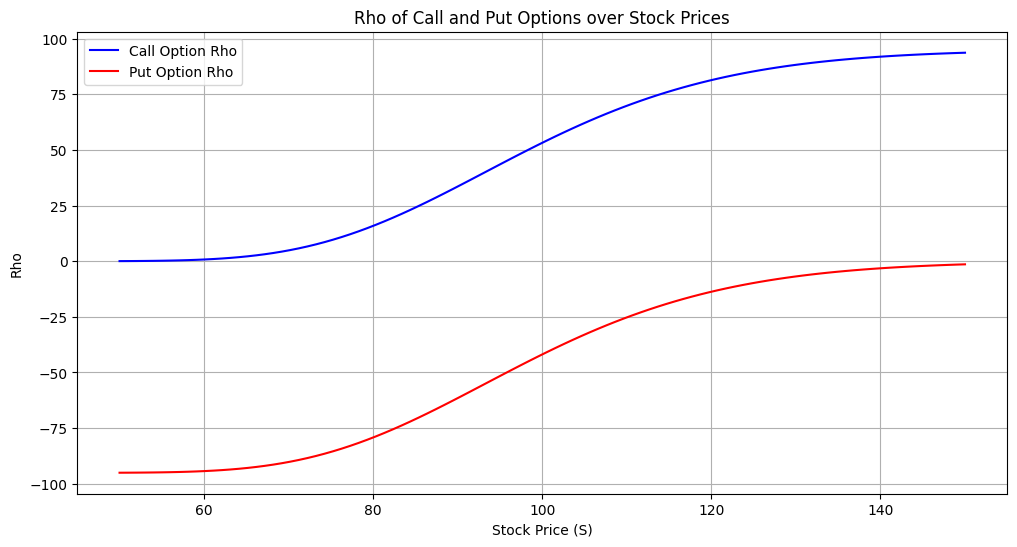

In [6]:

# Define Rho calculation for call and put options
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def rho(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == "call":
        return K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        return -K * T * np.exp(-r * T) * norm.cdf(-d2)

# Parameters
K = 100  # Strike price
T = 1    # Time to expiration in years
r = 0.05 # Risk-free interest rate
sigma = 0.2  # Volatility

# Range of stock prices
S_range = np.linspace(50, 150, 100)

# Calculate Rho for call and put options
rho_call = [rho(s, K, T, r, sigma, "call") for s in S_range]
rho_put = [rho(s, K, T, r, sigma, "put") for s in S_range]

# Plotting Rho for Call and Put Options
plt.figure(figsize=(12, 6))
plt.plot(S_range, rho_call, label="Call Option Rho", color="blue")
plt.plot(S_range, rho_put, label="Put Option Rho", color="red")
plt.xlabel("Stock Price (S)")
plt.ylabel("Rho")
plt.title("Rho of Call and Put Options over Stock Prices")
plt.legend()
plt.grid(True)
plt.show()
